# Human single-nuclei RNAseq : endometrium

In [2]:
# LOAD LIBRARIES
suppressPackageStartupMessages(library(Seurat)) # v5
suppressPackageStartupMessages(library(SeuratData)) # v0.2.2
suppressPackageStartupMessages(library(SeuratDisk)) # v0.0.0.9020
suppressPackageStartupMessages(library(SeuratObject)) # v4.1.3
suppressPackageStartupMessages(library(tidyverse)) # v2.0.0
suppressPackageStartupMessages(library(ggpubr)) # v0.6.0
suppressPackageStartupMessages(library(reticulate)) 
suppressPackageStartupMessages(library(leiden)) 

In [3]:
# Working directory set to source file location (in script/analysis/)

# Parameters 
species = "Human" # Mouse  Marmoset Macaque or Human
indir = "../../../../../evomens/ressources/ventotormo/endometriumAtlasV2_nuclei.h5seurat"
outdir = "../../../results/snRNA-seq/seuratobject/"

myseed = 1212

In [58]:
# Loading human dataset
human = LoadH5Seurat(file = indir)


Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding feature-level metadata for RNA

Adding reduction scVI

Adding cell embeddings for scVI

Adding miscellaneous information for scVI

Adding reduction umap

Adding cell embeddings for umap

Adding miscellaneous information for umap

Adding command information

Adding cell-level metadata

Adding miscellaneous information

Adding tool-specific results



In [59]:
table(human$Stage)
table(human$sample)


                Hormones                Menstrual            Proliferative 
                   44232                    12564                   123042 
Proliferative Disordered       Proliferative Late  Proliferative Menstrual 
                    7321                     6486                     1233 
               Secretory          Secretory Early            Secretory Mid 
                   44352                    21496                    50404 
                 Unknown 
                    1116 


UA_Endo10281925_FX1101 UA_Endo10281926_FX1101 UA_Endo11173480_FX0052 
                  9830                  11626                   7321 
UA_Endo11173480_FX1205 UA_Endo11173481_FX9022 UA_Endo11173482_FX9011 
                  1011                   4762                   4844 
UA_Endo11282193_EX0540 UA_Endo11282193_FX1146 UA_Endo11460960_EX0366 
                  6515                   6027                   8989 
UA_Endo11460960_FX1100 UA_Endo11460961_FX0011 UA_Endo11460961_FX1097 
                  4621                   5793                   8619 
UA_Endo11460962_FX1141 UA_Endo11460962_FX1170 UA_Endo11460963_FX1215 
                  1233                   1632                   2993 
UA_Endo11460963_FX9006 UA_Endo11596521_FX1236 UA_Endo11596522_FX1104 
                  2382                   6284                   6486 
UA_Endo11596522_FX9005 UA_Endo12061415_FX1158 UA_Endo12061415_FX1223 
                  8142                   1437                    900 
UA_Endo12061703_FX0

In [61]:
# Subset Mareckova dataset to keep only mid-secretory samples

sobj = subset(human, subset = Stage == c("Secretory Mid","Secretory"))

In [66]:
# Subset Mareckova dataset to keep only non endometriotic samples

sobj = subset(sobj, subset = Endometriosis_stage == "0")
table(sobj$Endometriosis_stage)

## No hormonal treatment for those samples
table(sobj$`Hormonal treatment`)


   0    1    2    3    4 
9529    0    0    0    0 


 COCP (Rigevidon)    COCP - Gederal           Implant       Mirena coil 
                0                 0                 0                 0 
              POP   POP - Cerezette POP - Desogestrel  POP Desogesterol 
                0                 0                 0                 0 
          Zoladex               nan 
                0              9529 

In [67]:
## Bilan of the samples included > 3 samples left
table(sobj$sample)


UA_Endo10281925_FX1101 UA_Endo10281926_FX1101 UA_Endo11173480_FX0052 
                     0                      0                      0 
UA_Endo11173480_FX1205 UA_Endo11173481_FX9022 UA_Endo11173482_FX9011 
                     0                      0                   2476 
UA_Endo11282193_EX0540 UA_Endo11282193_FX1146 UA_Endo11460960_EX0366 
                     0                      0                      0 
UA_Endo11460960_FX1100 UA_Endo11460961_FX0011 UA_Endo11460961_FX1097 
                     0                      0                      0 
UA_Endo11460962_FX1141 UA_Endo11460962_FX1170 UA_Endo11460963_FX1215 
                     0                      0                      0 
UA_Endo11460963_FX9006 UA_Endo11596521_FX1236 UA_Endo11596522_FX1104 
                     0                      0                      0 
UA_Endo11596522_FX9005 UA_Endo12061415_FX1158 UA_Endo12061415_FX1223 
                     0                      0                      0 
UA_Endo12061703_FX0

In [68]:
## Split layers per samples 
sobj[["RNA"]] <- split(sobj[["RNA"]], f = sobj$sample)
Layers(sobj)

Warning message:
“Input is a v3 assay and `split()` only works for v5 assays; converting
• to a v5 assay”
Warning message:
“Assay RNA changing from Assay to Assay5”


[1] "counts.UA_Endo11173482_FX9011" "counts.UA_Endo12296824_FX9008"
[3] "counts.UA_Endo12269810_FX1106" "counts.UA_Endo12604667_FX0028"
[5] "data.UA_Endo11173482_FX9011"   "data.UA_Endo12296824_FX9008"  
[7] "data.UA_Endo12269810_FX1106"   "data.UA_Endo12604667_FX0028"

In [69]:
sobj

An object of class Seurat 
33578 features across 9529 samples within 1 assay 
Active assay: RNA (33578 features, 0 variable features)
 8 layers present: counts.UA_Endo11173482_FX9011, counts.UA_Endo12296824_FX9008, counts.UA_Endo12269810_FX1106, counts.UA_Endo12604667_FX0028, data.UA_Endo11173482_FX9011, data.UA_Endo12296824_FX9008, data.UA_Endo12269810_FX1106, data.UA_Endo12604667_FX0028
 2 dimensional reductions calculated: scVI, umap

In [70]:
#------------------------------------------
### PROCESSING USING STANDART GUIDELINES FROM SEURAT

# Re run a standart processing to get a clustering for cells from early-mid and mid secretory only.
# This object was already preprocessed for Doublets and Ambiant RNA by Garcia-Alonso et al 2021, we use their assay "RNA"
DefaultAssay(sobj) = "RNA"
sobj = NormalizeData(sobj, normalization.method = "LogNormalize")
sobj = FindVariableFeatures(sobj, selection.method = "vst", nfeatures = 800)
sobj = ScaleData(sobj)

Normalizing layer: counts.UA_Endo11173482_FX9011

Normalizing layer: counts.UA_Endo12296824_FX9008

Normalizing layer: counts.UA_Endo12269810_FX1106

Normalizing layer: counts.UA_Endo12604667_FX0028

Finding variable features for layer counts.UA_Endo11173482_FX9011

Finding variable features for layer counts.UA_Endo12296824_FX9008

Finding variable features for layer counts.UA_Endo12269810_FX1106

Finding variable features for layer counts.UA_Endo12604667_FX0028

Centering and scaling data matrix



In [71]:
sobj = RunPCA(sobj, 
                reduction.name = "pca", 
                npcs = 50, 
                seed.use = myseed)

PC_ 1 
Positive:  RHEX, PATJ, FGD4, NCALD, EYA2, LINC01541, L3MBTL4, UBE2D2, RBM47, PLCB1 
	   TMEM101, PAX8, MECOM, AC024230.1, WWC1, SAMD12, ASRGL1, PCAT1, GRHL2, PAX2 
	   MAP7, PAX8-AS1, SHROOM3, PLCB4, PCED1B, ALCAM, CNTN5, GABRP, RALGAPA2, PLEKHA7 
Negative:  TSHZ3, NR2F2-AS1, TWIST2, CHSY3, PLCL1, HAND2-AS1, NLGN1, AP001347.1, LDB2, EBF1 
	   ZEB1, HPSE2, PDGFRA, TMEM196, LAMA2, XYLT1, SYNPO2, WT1, SLC24A3, MME 
	   CDH11, SNCAIP, APCDD1, RORB, MEG3, CACNA2D1, NRP1, NR2F1-AS1, ARHGAP20, PDZRN3 
PC_ 2 
Positive:  PTPRM, TSHZ2, MAGI1, FAM155A, PTPRG, SOX5, KIAA1217, PPM1H, ZFPM2-AS1, LINC01320 
	   MECOM, SHROOM3, NPAS3, RBPMS, EYA2, RHEX, RIMKLB, RXFP1, BMPR1B, PLEKHA7 
	   ENPP3, THSD4, GABRP, SAT1, SAMD12, BICD1, UGT2B7, AC024230.1, PCAT1, LINC01541 
Negative:  ITGAD, ITGAX, KLRC2, IKZF1, NCAM1, DOCK2, ATP8B4, LCP2, TRG-AS1, CD247 
	   KCNQ5, PYHIN1, KLRC1, PTPRC, SLA, PIK3R6, DOCK10, FLI1, SLFN12L, CD96 
	   KLRC3, DPF3, INPP5D, LINC00996, STAT4, CD38, IL2RB, LINC00299, CLEC12

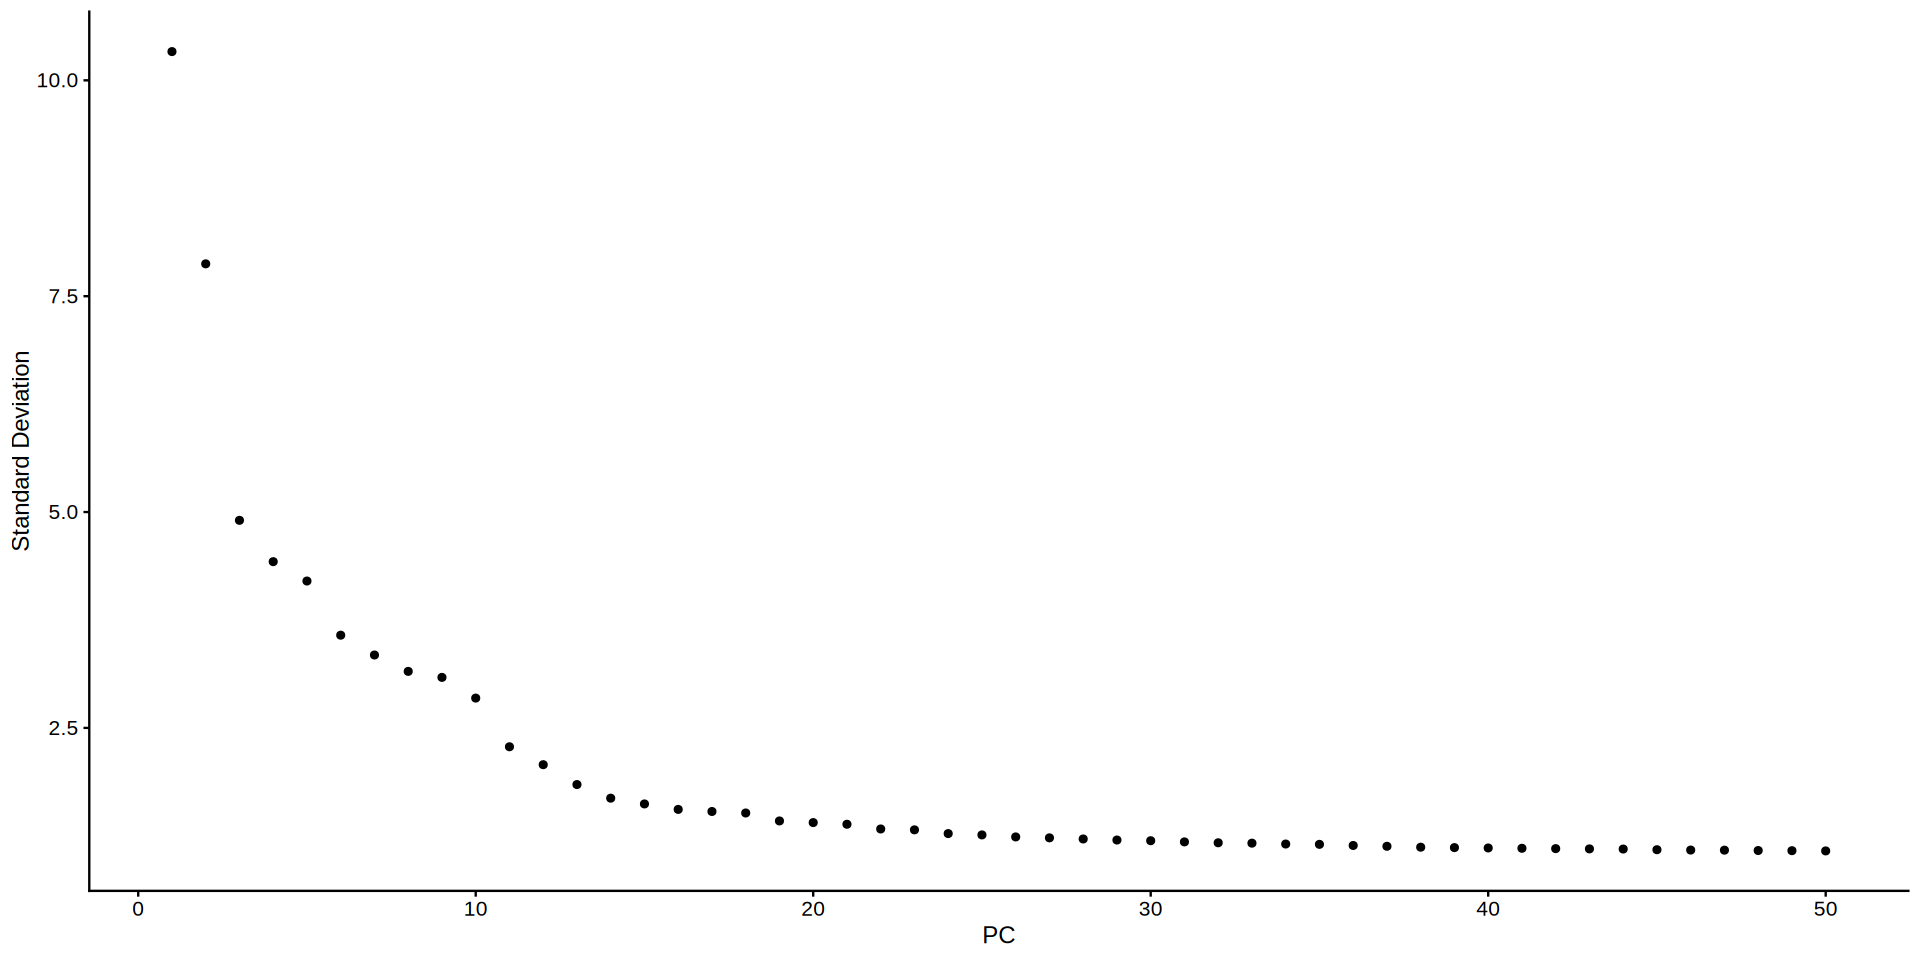

In [72]:
# Choose the PC to run the UMAP
ElbowPlot(sobj, ndims = 50)

In [78]:
# Run UMAP
sobj = RunUMAP(sobj, 
                 reduction="pca", 
                 dims = 1:30, 
                 reduction.name="umap", seed.use = myseed)

15:33:20 UMAP embedding parameters a = 0.9922 b = 1.112

15:33:20 Read 9529 rows and found 30 numeric columns

15:33:20 Using Annoy for neighbor search, n_neighbors = 30

15:33:20 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:33:21 Writing NN index file to temp file /local/scratch/tmp/RtmphhB4Dw/file106c3e2e9d9629

15:33:21 Searching Annoy index using 1 thread, search_k = 3000

15:33:24 Annoy recall = 100%

15:33:25 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

15:33:25 Initializing from normalized Laplacian + noise (using RSpectra)

15:33:26 Commencing optimization for 500 epochs, with 428686 positive edges

15:33:37 Optimization finished



In [79]:
# Finding clusters based on only early mid and mid secretory phases
sobj = FindNeighbors(sobj, 
                       reduction = "pca")

Computing nearest neighbor graph

Computing SNN



In [80]:
sobj = FindClusters(sobj, 
                      resolution = c(0.2, 0.3, 0.4, 0.5, 0.6), 
                      random.seed = myseed, 
                      algorithm = 1) # using Louvain

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9529
Number of edges: 341685

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9724
Number of communities: 13
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9529
Number of edges: 341685

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9608
Number of communities: 13
Elapsed time: 1 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9529
Number of edges: 341685

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9492
Number of communities: 13
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9529
Number of edges: 341685

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9378
Number of communities: 14
Elapsed time: 0 seconds
Modularity Optim

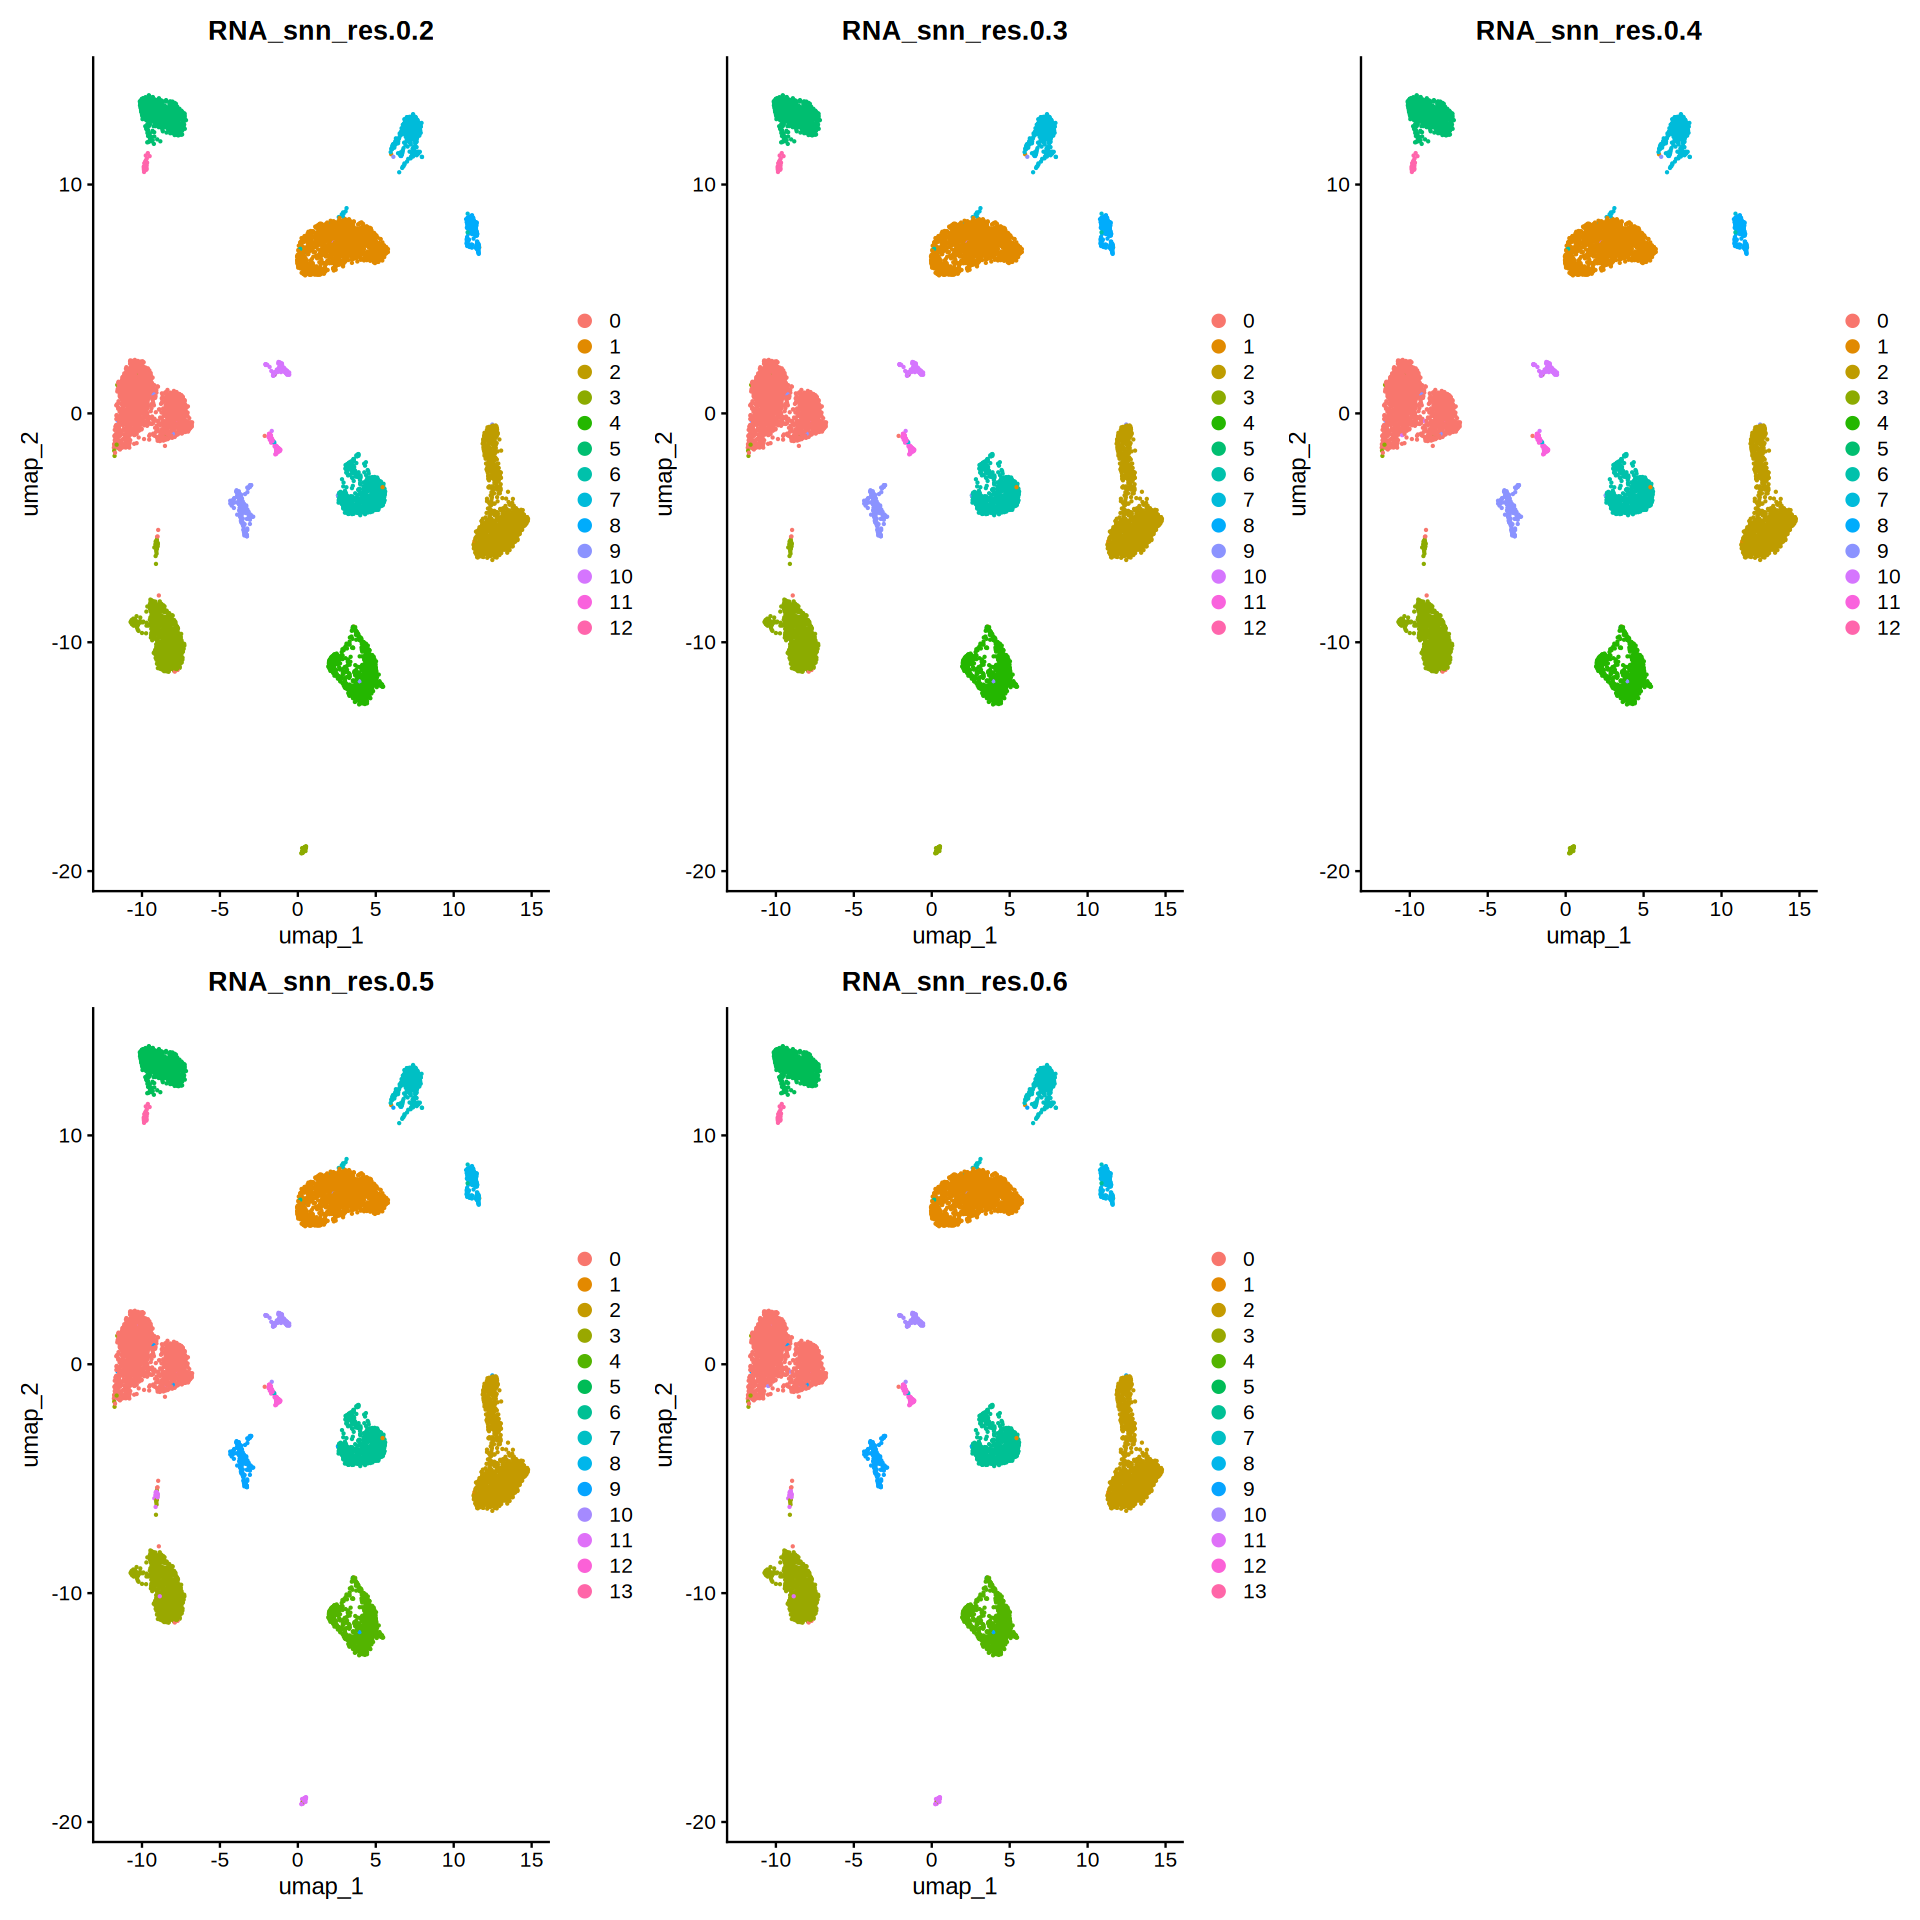

In [81]:
options(repr.plot.width=16, repr.plot.height=16)
# Look at the clustering 
DimPlot(sobj, reduction = "umap", 
        group.by = c("RNA_snn_res.0.2", "RNA_snn_res.0.3", "RNA_snn_res.0.4", "RNA_snn_res.0.5", "RNA_snn_res.0.6"))

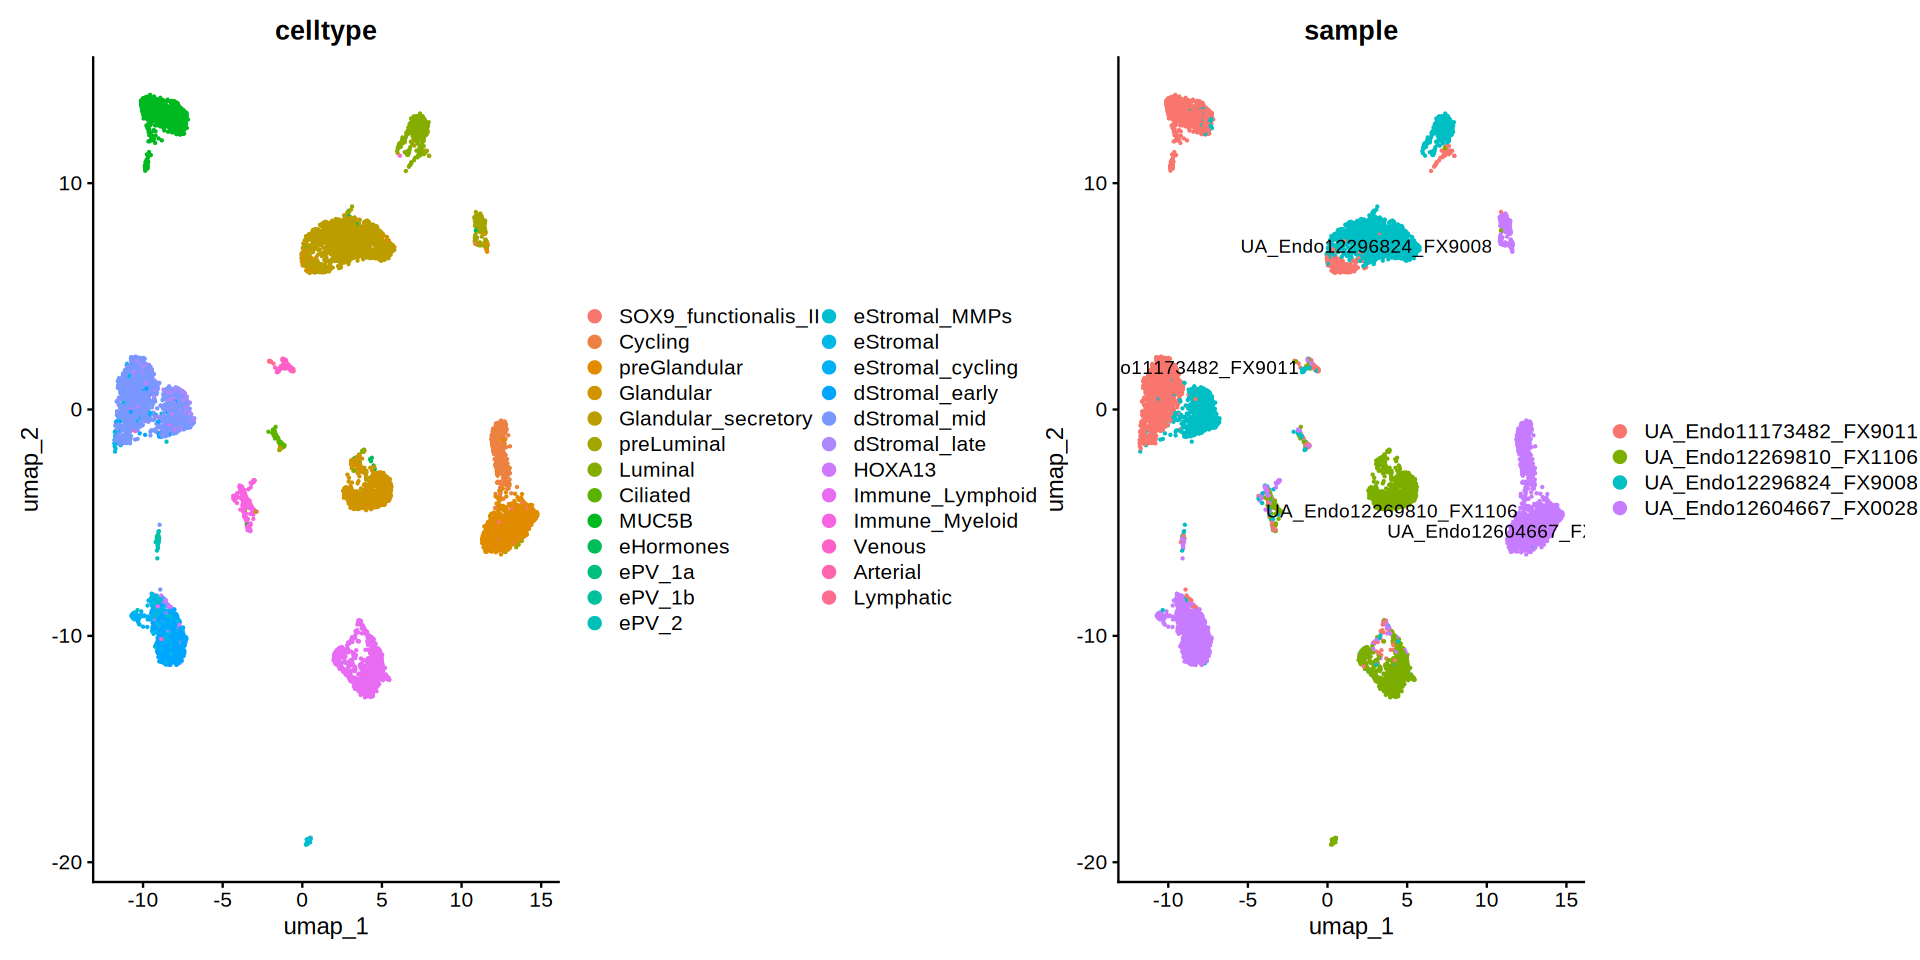

In [82]:
options(repr.plot.width=16, repr.plot.height=8)

# Look at the clustering 
a = DimPlot(sobj, reduction = "umap", 
        group.by = c("celltype")) 
b = DimPlot(sobj, reduction = "umap", 
        group.by = c("sample"), 
        label = TRUE) 
# c = DimPlot(sobj, reduction = "scVI", 
#         group.by = c("RNA_snn_res.0.2"), 
#         label = TRUE) 
a +b


## Integration over samples

In [83]:
# Integration - using reduciton PCA with 40 dimentions
sobj = IntegrateLayers(
  object = sobj, method = "HarmonyIntegration",
  orig.reduction = "pca", new.reduction = "harmony",
  verbose = TRUE
)


#------------------------------------------------------------------------
# PROCESSING POST INTEGRATION

# Rerun clustering to visualise the new clusters 
sobj = FindNeighbors(sobj, reduction = "harmony", dims = 1:30)
sobj = FindClusters(sobj, resolution = 0.5, cluster.name = "harmony_clusters")

# Rerun 2D reduction (UMAP) with the new reduction integrated
sobj = RunUMAP(sobj, reduction = "harmony", dims = 1:30, reduction.name = "umap_harmony")


Warning message:
“HarmonyMatrix is deprecated and will be removed in the future from the API in the future”
Warning message:
“Warning: The parameters do_pca and npcs are deprecated. They will be ignored for this function call and please remove parameters do_pca and npcs and pass to harmony cell_embeddings directly.
This warning is displayed once per session.”
Warning message:
“Warning: The parameter tau is deprecated. It will be ignored for this function call and please remove parameter tau in future function calls. Advanced users can set value of parameter tau by using parameter .options and function harmony_options().
This warning is displayed once per session.”
Warning message:
“Warning: The parameter block.size is deprecated. It will be ignored for this function call and please remove parameter block.size in future function calls. Advanced users can set value of parameter block.size by using parameter .options and function harmony_options().
This warning is displayed once per sessi

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9529
Number of edges: 414804

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9223
Number of communities: 15
Elapsed time: 1 seconds


15:34:27 UMAP embedding parameters a = 0.9922 b = 1.112

15:34:27 Read 9529 rows and found 30 numeric columns

15:34:27 Using Annoy for neighbor search, n_neighbors = 30

15:34:27 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:34:28 Writing NN index file to temp file /local/scratch/tmp/RtmphhB4Dw/file106c3e6b98c3e4

15:34:28 Searching Annoy index using 1 thread, search_k = 3000

15:34:31 Annoy recall = 100%

15:34:32 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

15:34:32 Initializing from normalized Laplacian + noise (using RSpectra)

15:34:33 Commencing optimization for 500 epochs, with 435802 positive edges

15:34:43 Optimization finished



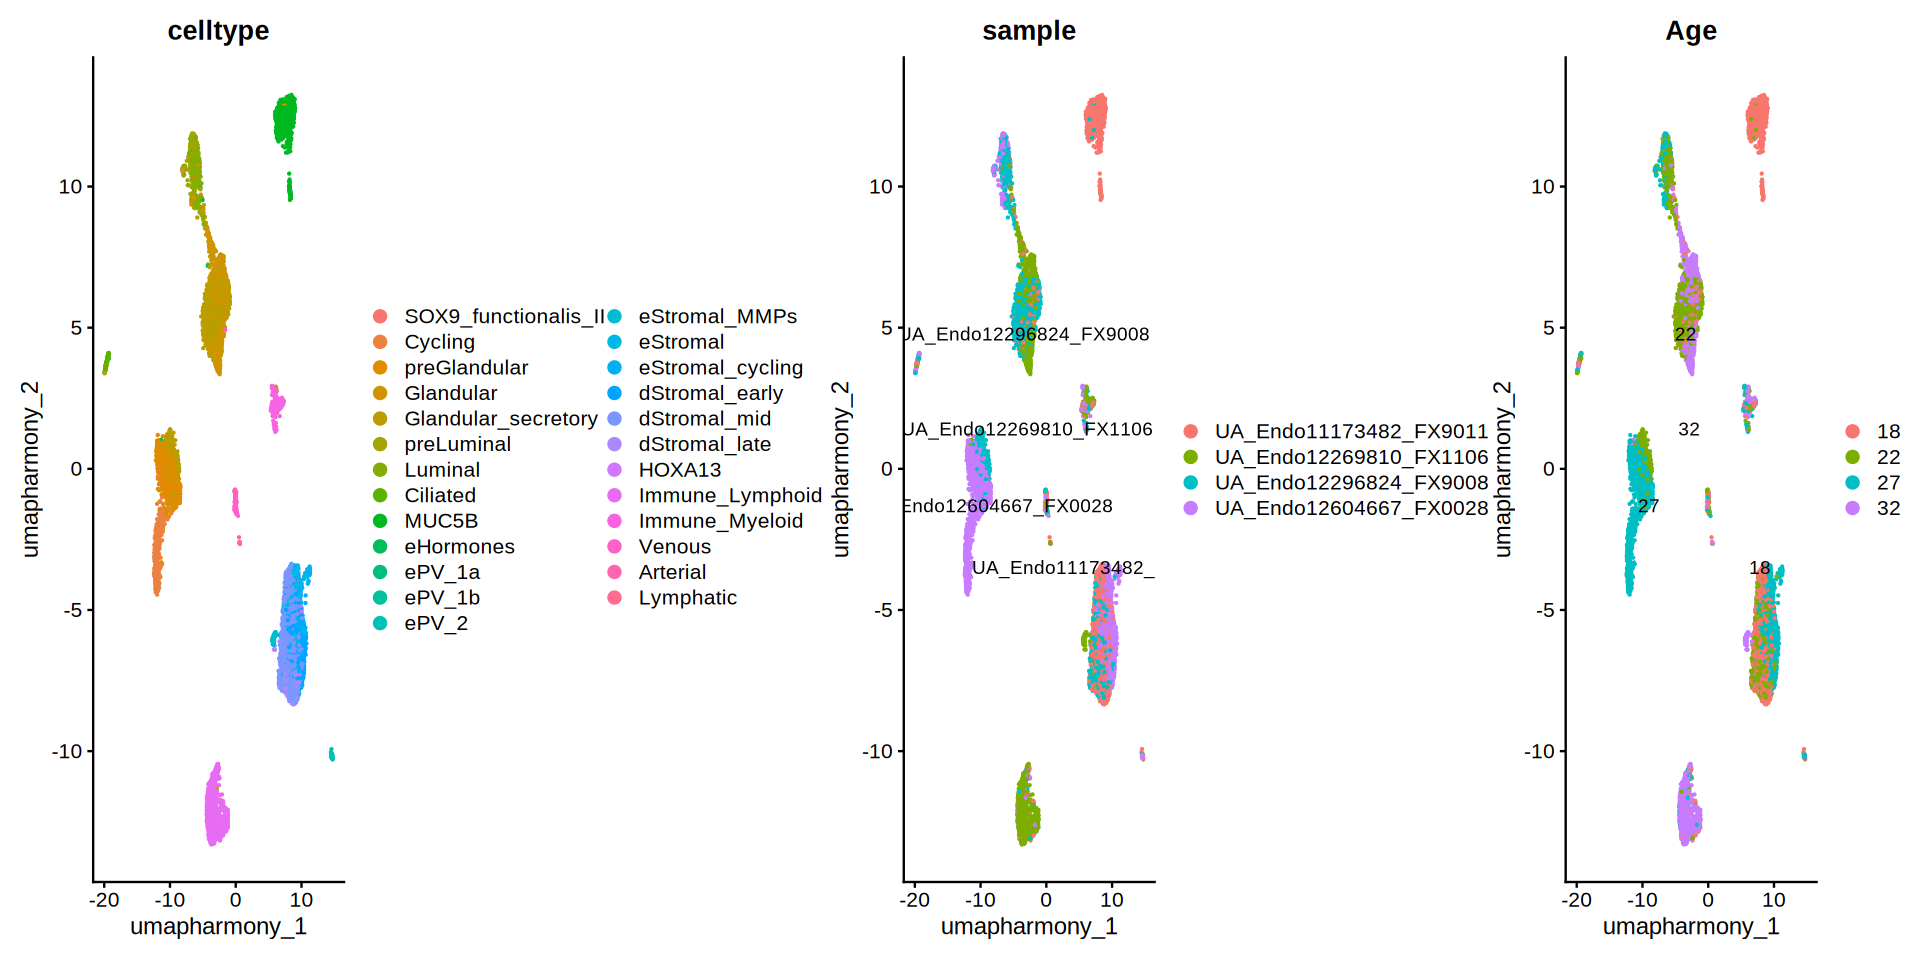

In [98]:
options(repr.plot.width=16, repr.plot.height=8)

# Look at the clustering post integration 
a = DimPlot(sobj, reduction = "umap_harmony", 
        group.by = c("celltype")) 
b = DimPlot(sobj, reduction = "umap_harmony", 
        group.by = c("sample"), 
        label = TRUE) 
c = DimPlot(sobj, reduction = "umap_harmony", 
        group.by = c("Age"), 
        label = TRUE) 
# c = DimPlot(sobj, reduction = "scVI", 
#         group.by = c("RNA_snn_res.0.2"), 
#         label = TRUE) 
a +b +c

## Manual annotation 

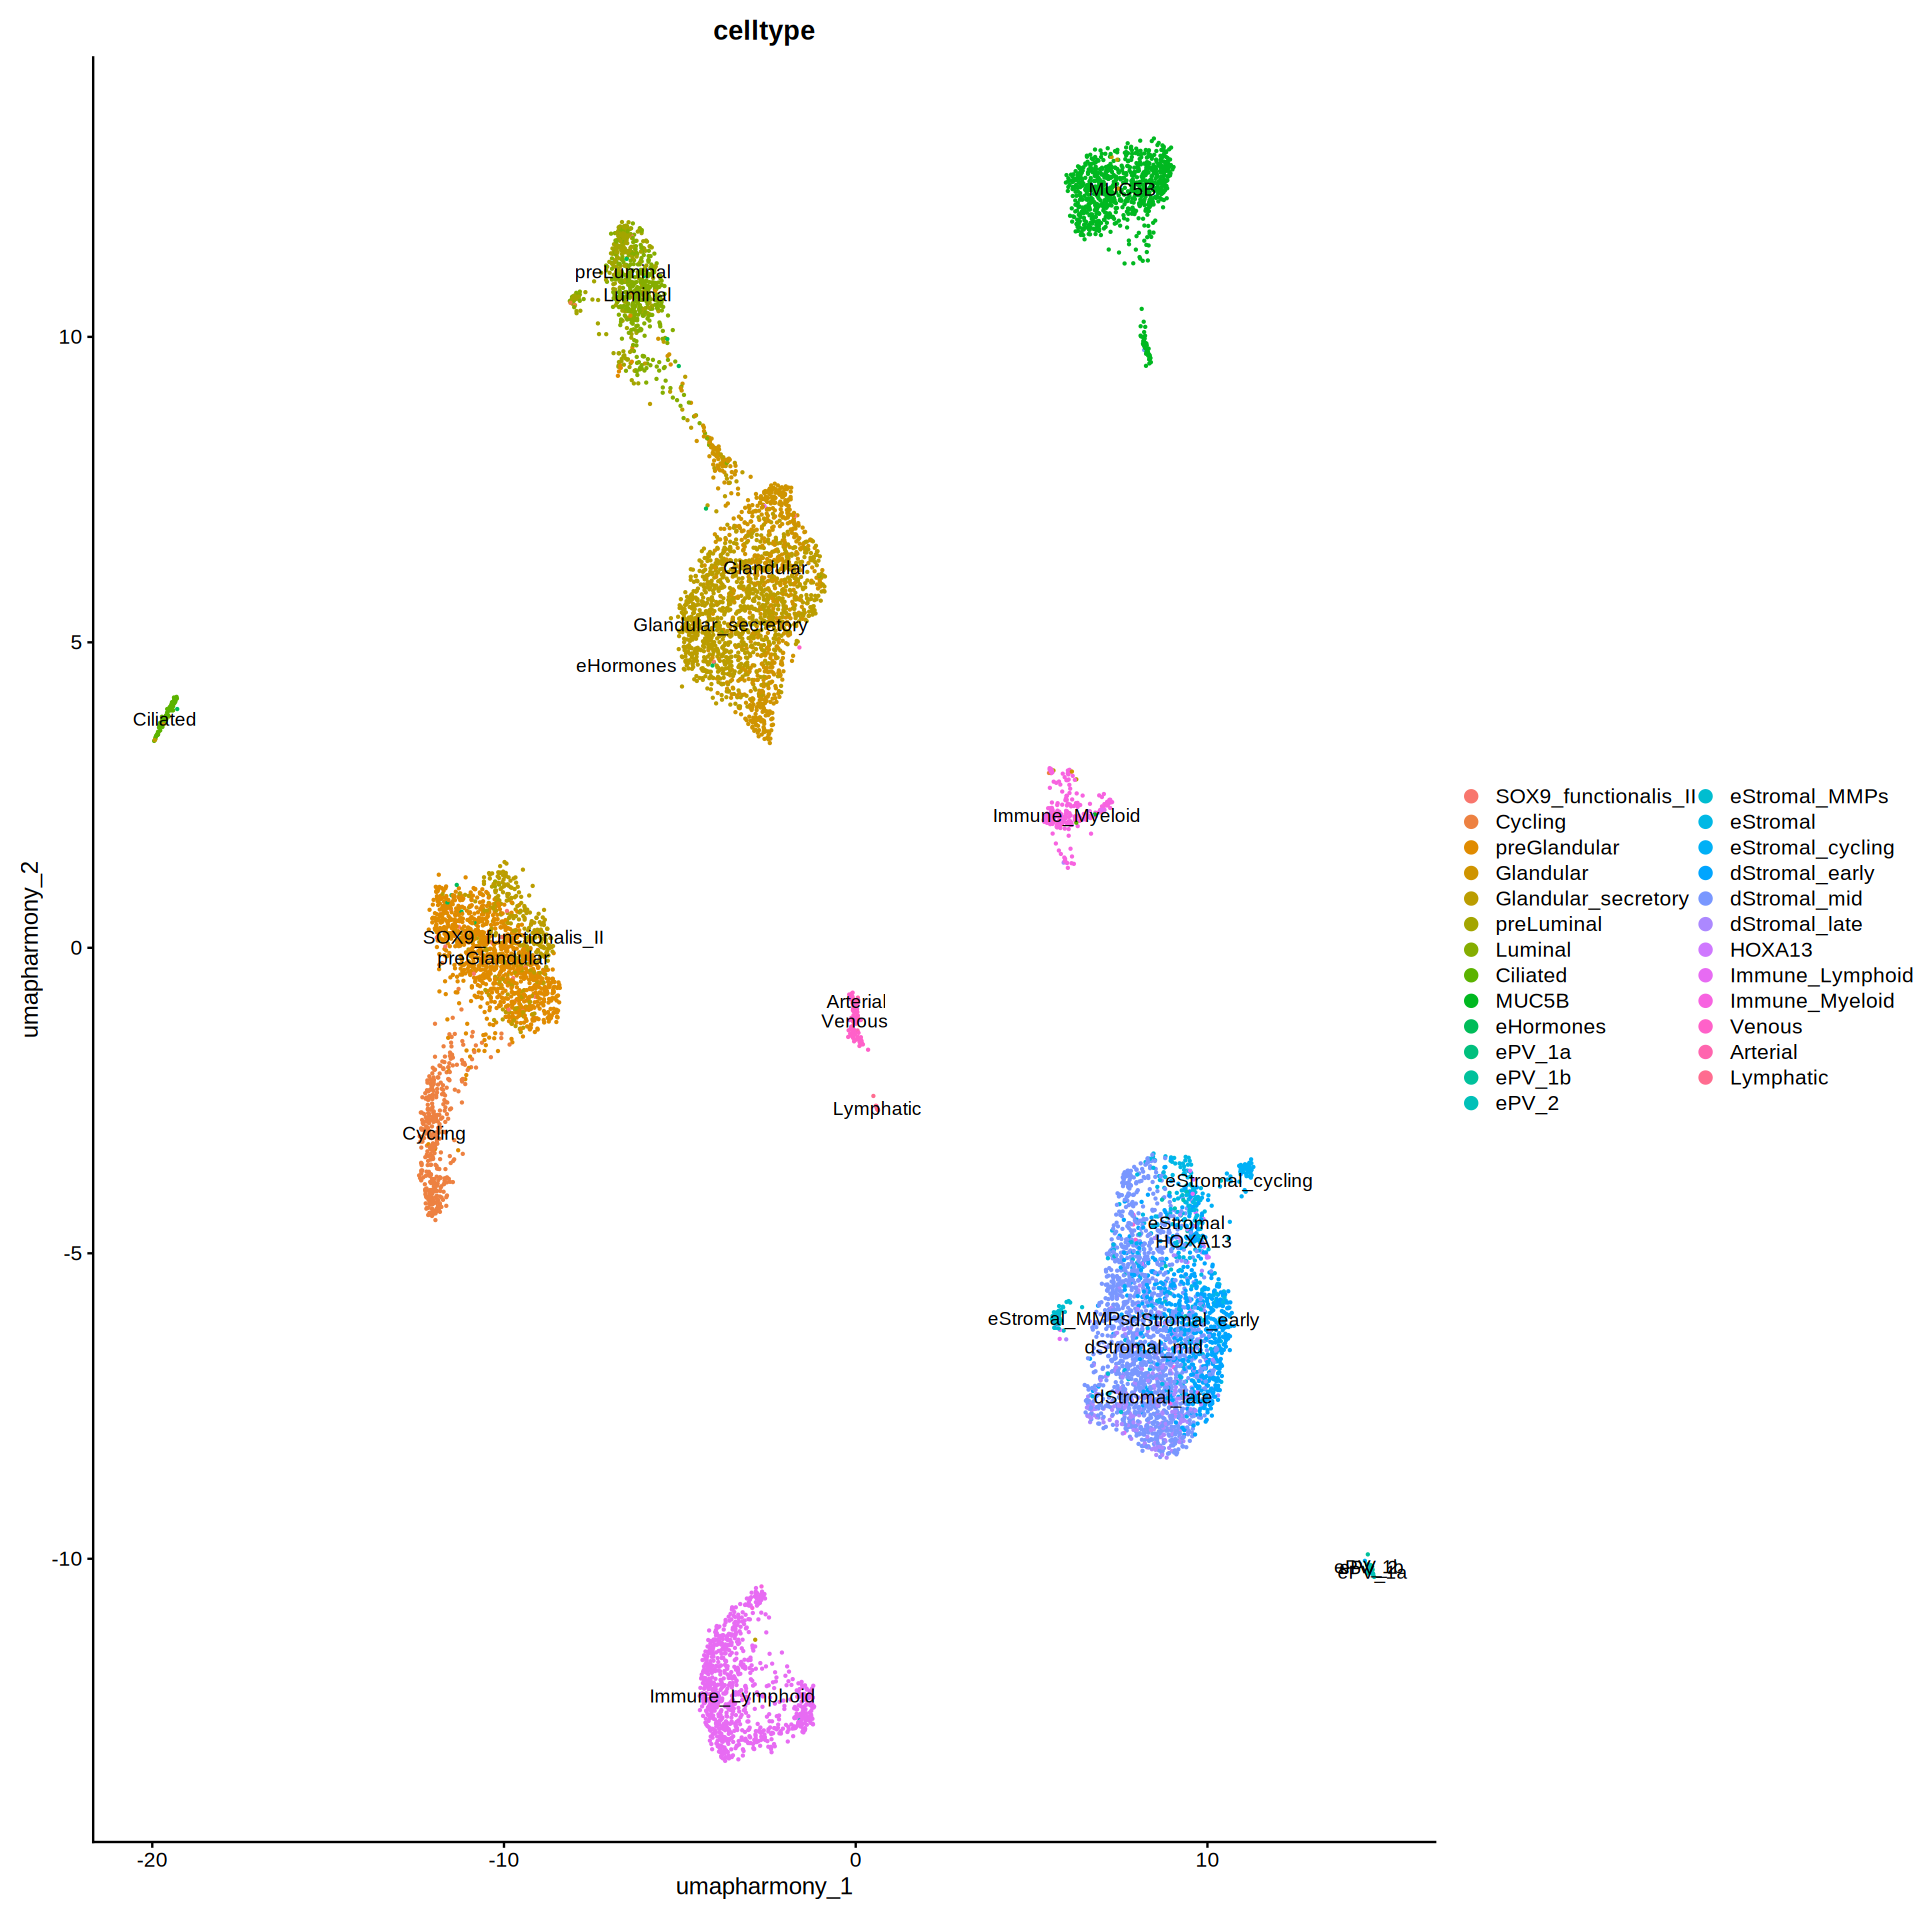

In [104]:
options(repr.plot.width=16, repr.plot.height=16)

DimPlot(sobj, reduction = "umap_harmony", 
        group.by = c("celltype"), 
        label = TRUE) 

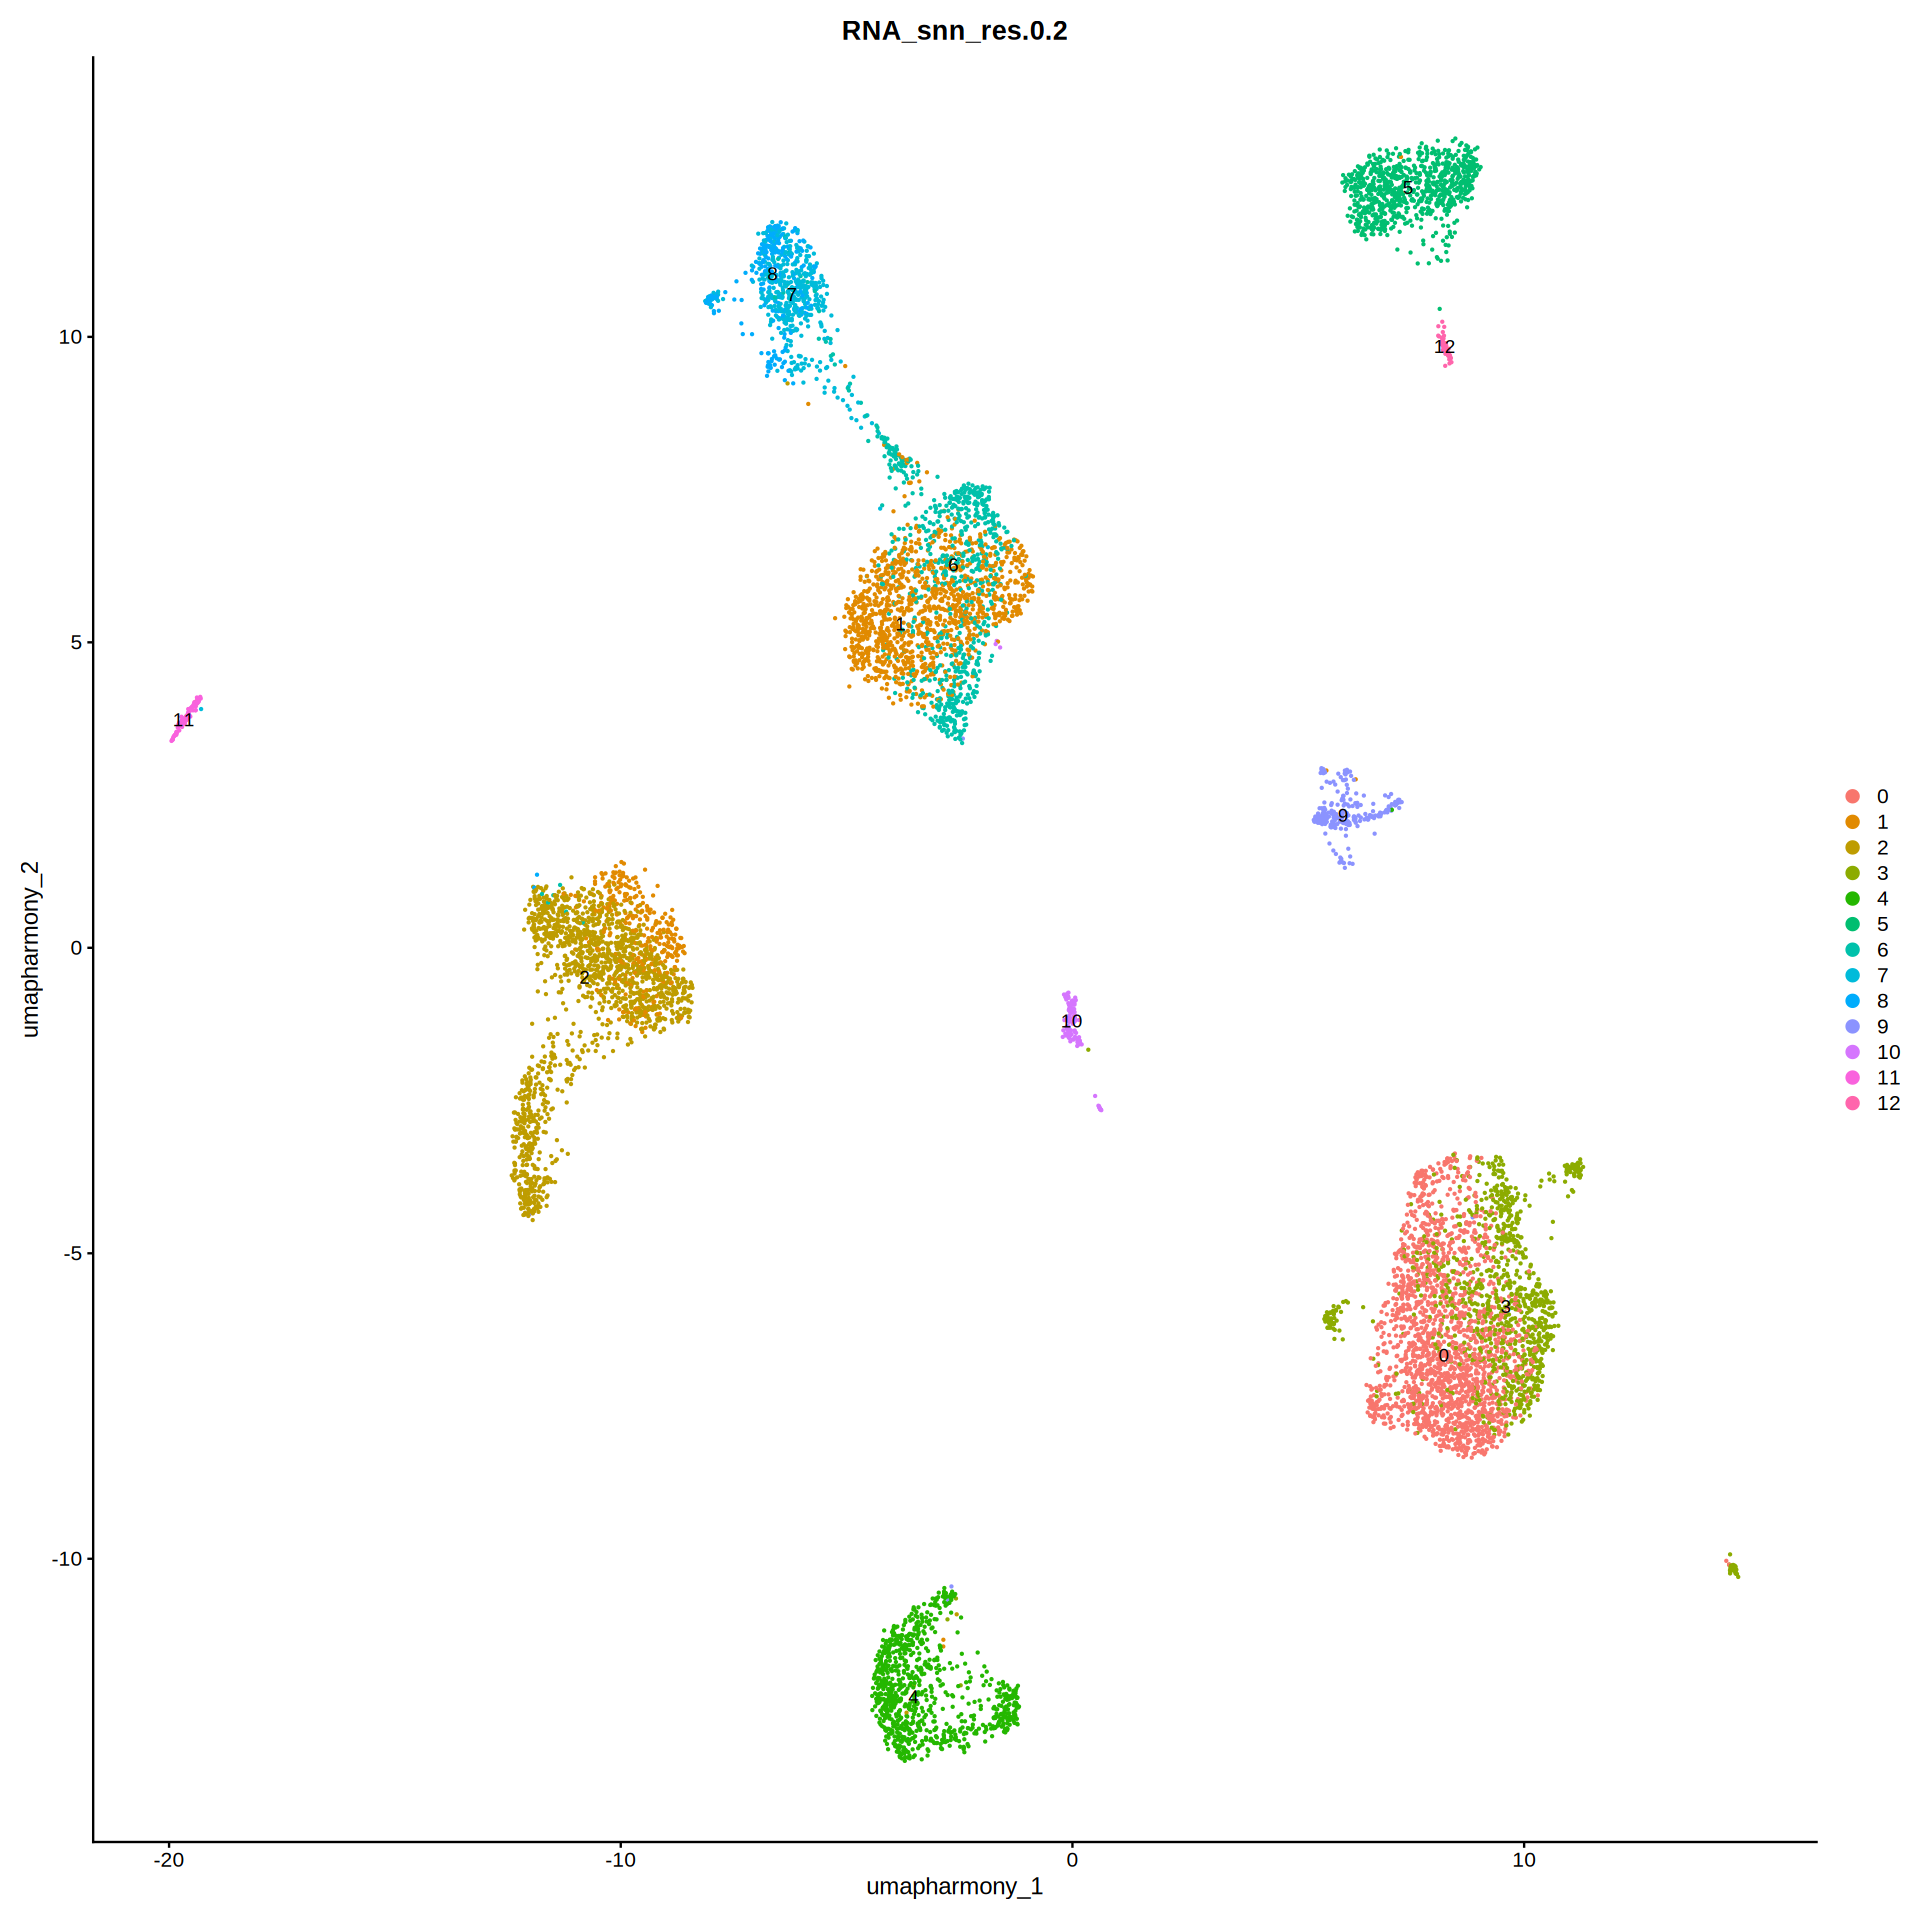

In [105]:
DimPlot(sobj, reduction = "umap_harmony", 
        group.by = c("RNA_snn_res.0.2"), 
        label = TRUE) 

In [5]:
# Set the clustering of interest as ident 
Idents(sobj) = sobj$RNA_snn_res.0.2

In [6]:
## Give Manual annotation to our new clustering 
manual_annot = c("Stromal",
                 "Epithelial_Glandular_Secretory", 
                 "Epithelial_Precursors", 
                  "Stromal", 
                  "Lymphoid",
                  "MUC5B",
                 "Epithelial_Glandular_Secretory",
                  "Epithelial_Luminal",
                 "Epithelial_Luminal",
                 "Myeloid",
                 "Endothelial",
                 "Epithelial_Ciliated", 
                  "MUC5B")

# Set the levels to Manual Annotation 
sobj$Manual_annotation = sobj$RNA_snn_res.0.2
names(manual_annot) = levels(sobj)
# Change Ident to the manual annotation 
sobj = RenameIdents(sobj, manual_annot)
# Replace labels for the column Manual Annotation
sobj$Manual_annotation = Idents(sobj)

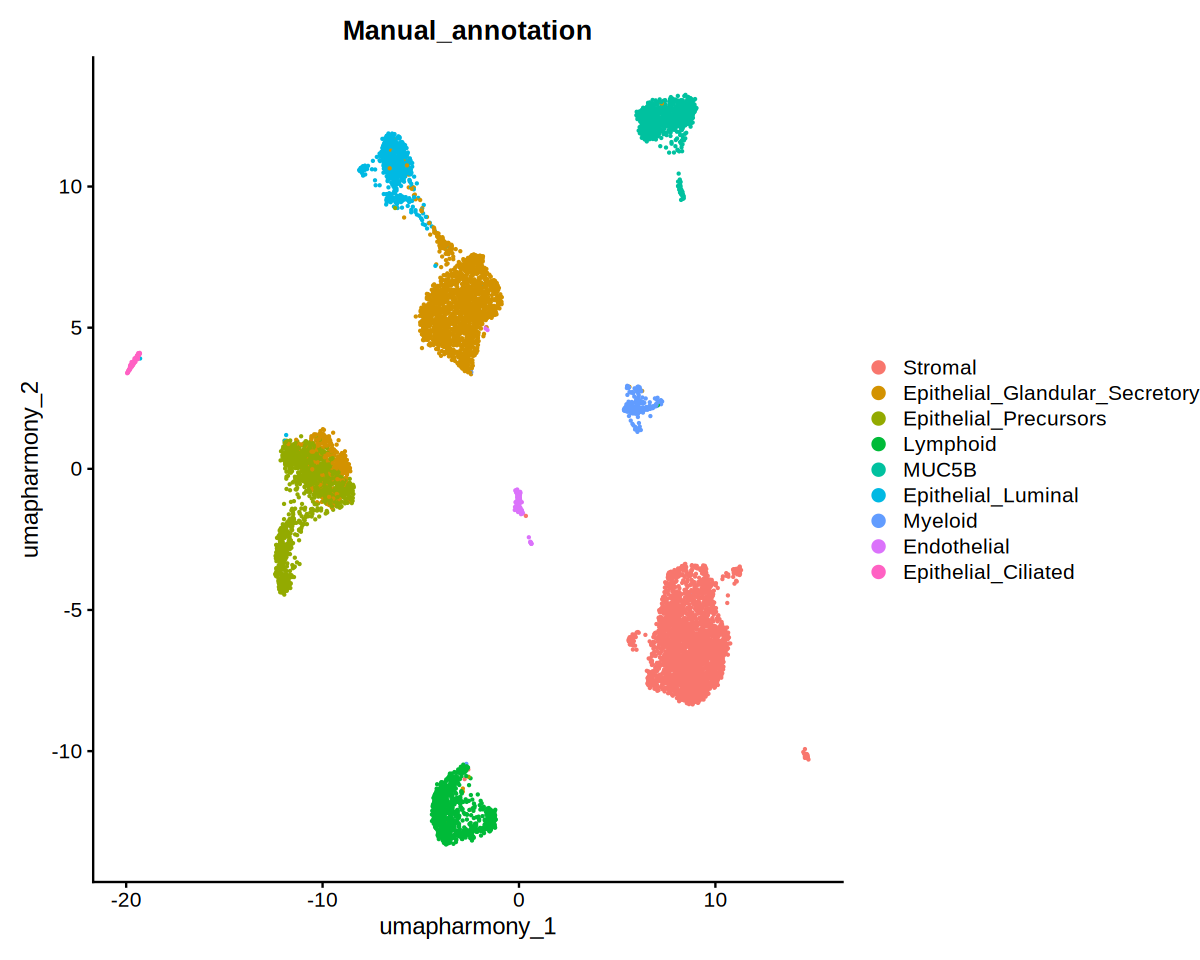

In [7]:
options(repr.plot.width=10, repr.plot.height=8)

# Manual annotation 
DimPlot(sobj, reduction = "umap_harmony", group.by = "Manual_annotation") 

In [4]:
# sobj = readRDS(file = paste0(outdir,species,"_processed.rds"))

### Filtering out Human Cervical cells 

In [5]:
sobj = subset(sobj, subset = Manual_annotation != "MUC5B")


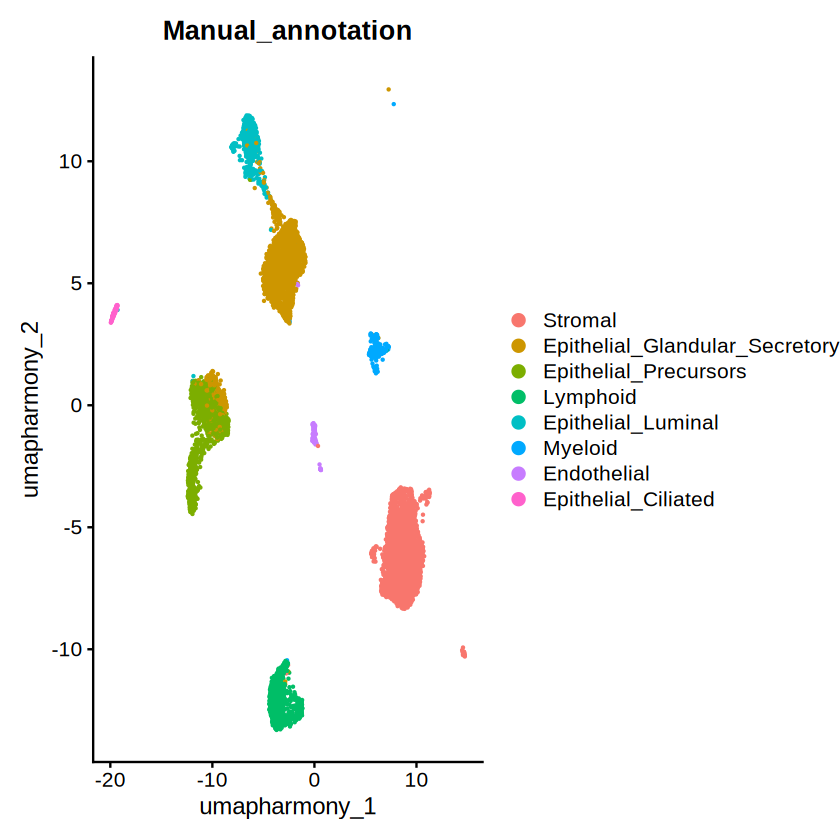

In [6]:
## Manual annotation after MUC5B removal 
DimPlot(sobj, reduction = "umap_harmony", group.by = "Manual_annotation") 

Now that we have the final dataset for Human single-nuclei, we have to perform a final processing. Indeed, removing a cell population results in a biaised 2D space as the previous one was also considering variable features from the MUC5B population. 


In [7]:
## ReRun variable features selection, PCA and Integration 
# Re run a standart processing to get a clustering for cells from early-mid and mid secretory only.
# This object was already preprocessed for Doublets and Ambiant RNA by Garcia-Alonso et al 2021, we use their assay "RNA"
DefaultAssay(sobj) = "RNA"
sobj = NormalizeData(sobj, normalization.method = "LogNormalize")
sobj = FindVariableFeatures(sobj, selection.method = "vst", nfeatures = 800)
sobj = ScaleData(sobj)
sobj = RunPCA(sobj, 
                reduction.name = "pca", 
                npcs = 50, 
                seed.use = myseed)


Normalizing layer: counts.UA_Endo11173482_FX9011

Normalizing layer: counts.UA_Endo12296824_FX9008

Normalizing layer: counts.UA_Endo12269810_FX1106

Normalizing layer: counts.UA_Endo12604667_FX0028

Finding variable features for layer counts.UA_Endo11173482_FX9011

Finding variable features for layer counts.UA_Endo12296824_FX9008

Finding variable features for layer counts.UA_Endo12269810_FX1106

Finding variable features for layer counts.UA_Endo12604667_FX0028

Centering and scaling data matrix

Warning message:
“Different features in new layer data than already exists for scale.data”
PC_ 1 
Positive:  NR2F2-AS1, TSHZ3, CHSY3, TWIST2, PLCL1, HAND2-AS1, SLC24A3, NLGN1, ZEB1, AP001347.1 
	   LDB2, EBF1, HPSE2, XYLT1, PDGFRA, TMEM196, LAMA2, PDZRN3, SYNPO2, WT1 
	   MME, CDH11, SNCAIP, APCDD1, FLRT2, RORB, MEG3, UST, NRP1, CACNA2D1 
Negative:  LINC01541, NCALD, L3MBTL4, PATJ, RHEX, FGD4, EYA2, TMEM101, PAX8, AC024230.1 
	   PCAT1, PAX8-AS1, RBM47, WWC1, UBE2D2, PLCB1, GABRP, CNTN5, MECO

In [8]:
# Integration - using reduciton PCA with 40 dimentions
sobj = IntegrateLayers(
  object = sobj, method = "HarmonyIntegration",
  orig.reduction = "pca", new.reduction = "harmony",
  verbose = TRUE
)


Warning message:
“HarmonyMatrix is deprecated and will be removed in the future from the API in the future”
Warning message:
“Warning: The parameters do_pca and npcs are deprecated. They will be ignored for this function call and please remove parameters do_pca and npcs and pass to harmony cell_embeddings directly.
This warning is displayed once per session.”
Warning message:
“Warning: The parameter tau is deprecated. It will be ignored for this function call and please remove parameter tau in future function calls. Advanced users can set value of parameter tau by using parameter .options and function harmony_options().
This warning is displayed once per session.”
Warning message:
“Warning: The parameter block.size is deprecated. It will be ignored for this function call and please remove parameter block.size in future function calls. Advanced users can set value of parameter block.size by using parameter .options and function harmony_options().
This warning is displayed once per sessi

In [13]:
# Rerun 2D reduction (UMAP) with the new reduction integrated
sobj = RunUMAP(sobj, reduction = "harmony", dims = 1:20, reduction.name = "umap_harmony")


18:32:12 UMAP embedding parameters a = 0.9922 b = 1.112

18:32:12 Read 8645 rows and found 20 numeric columns

18:32:12 Using Annoy for neighbor search, n_neighbors = 30

18:32:12 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:32:13 Writing NN index file to temp file /local/scratch/tmp/Rtmp7PWqAo/file39aa7f3ceef1c2

18:32:13 Searching Annoy index using 1 thread, search_k = 3000

18:32:16 Annoy recall = 100%

18:32:16 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

18:32:17 Initializing from normalized Laplacian + noise (using RSpectra)

18:32:17 Commencing optimization for 500 epochs, with 386552 positive edges

18:32:27 Optimization finished



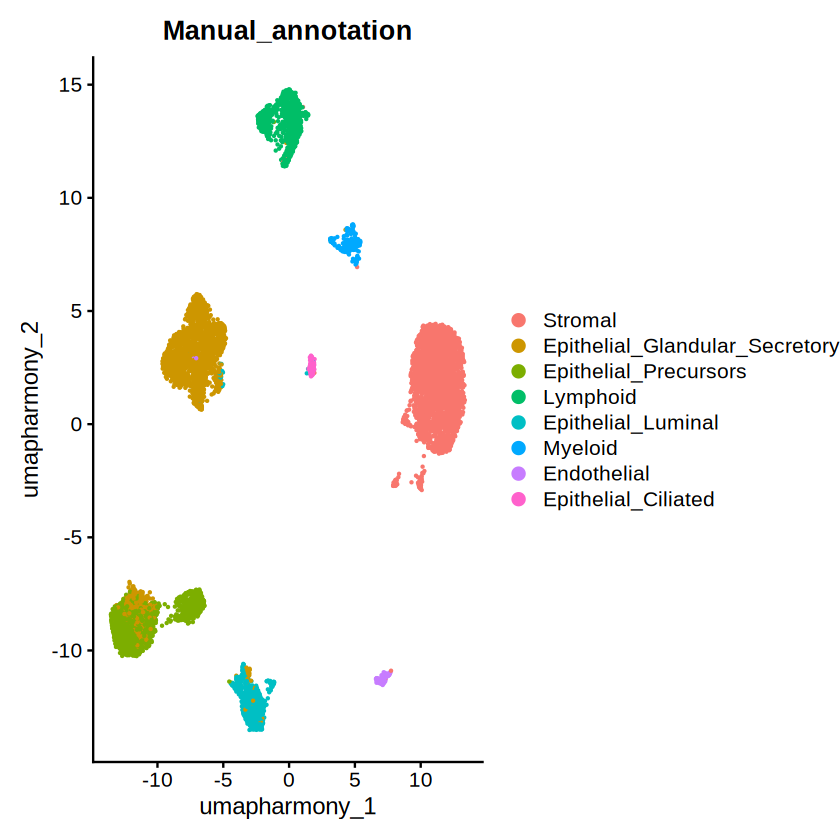

In [14]:
## Manual annotation after MUC5B removal 
DimPlot(sobj, reduction = "umap_harmony", group.by = "Manual_annotation") 

In [16]:
#------------------------------------------
### OUTPUT 

# Saving RDS object post QC 
saveRDS(sobj, file = paste0(outdir ,species,"_processed.rds"))


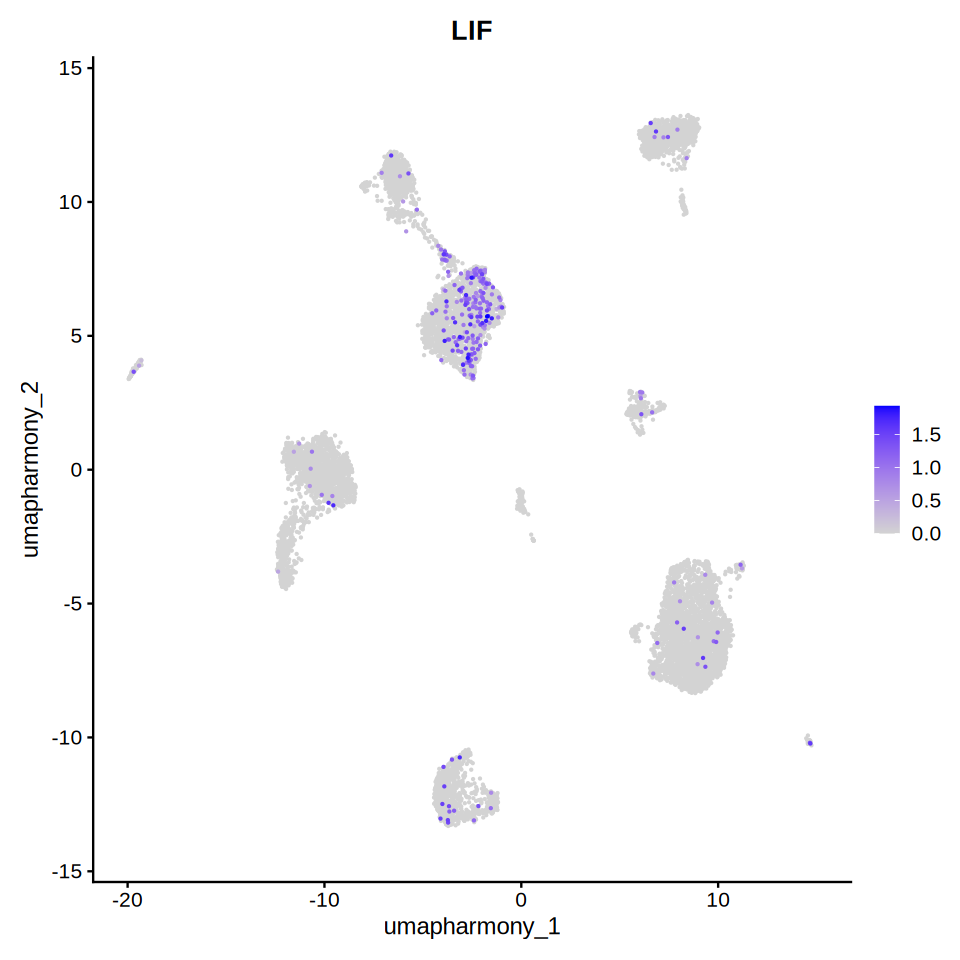

In [86]:
options(repr.plot.width=8, repr.plot.height=8)

## Quick look at LIF expression 

FeaturePlot(sobj, features = "LIF", reduction = "umap_harmony", order = T)

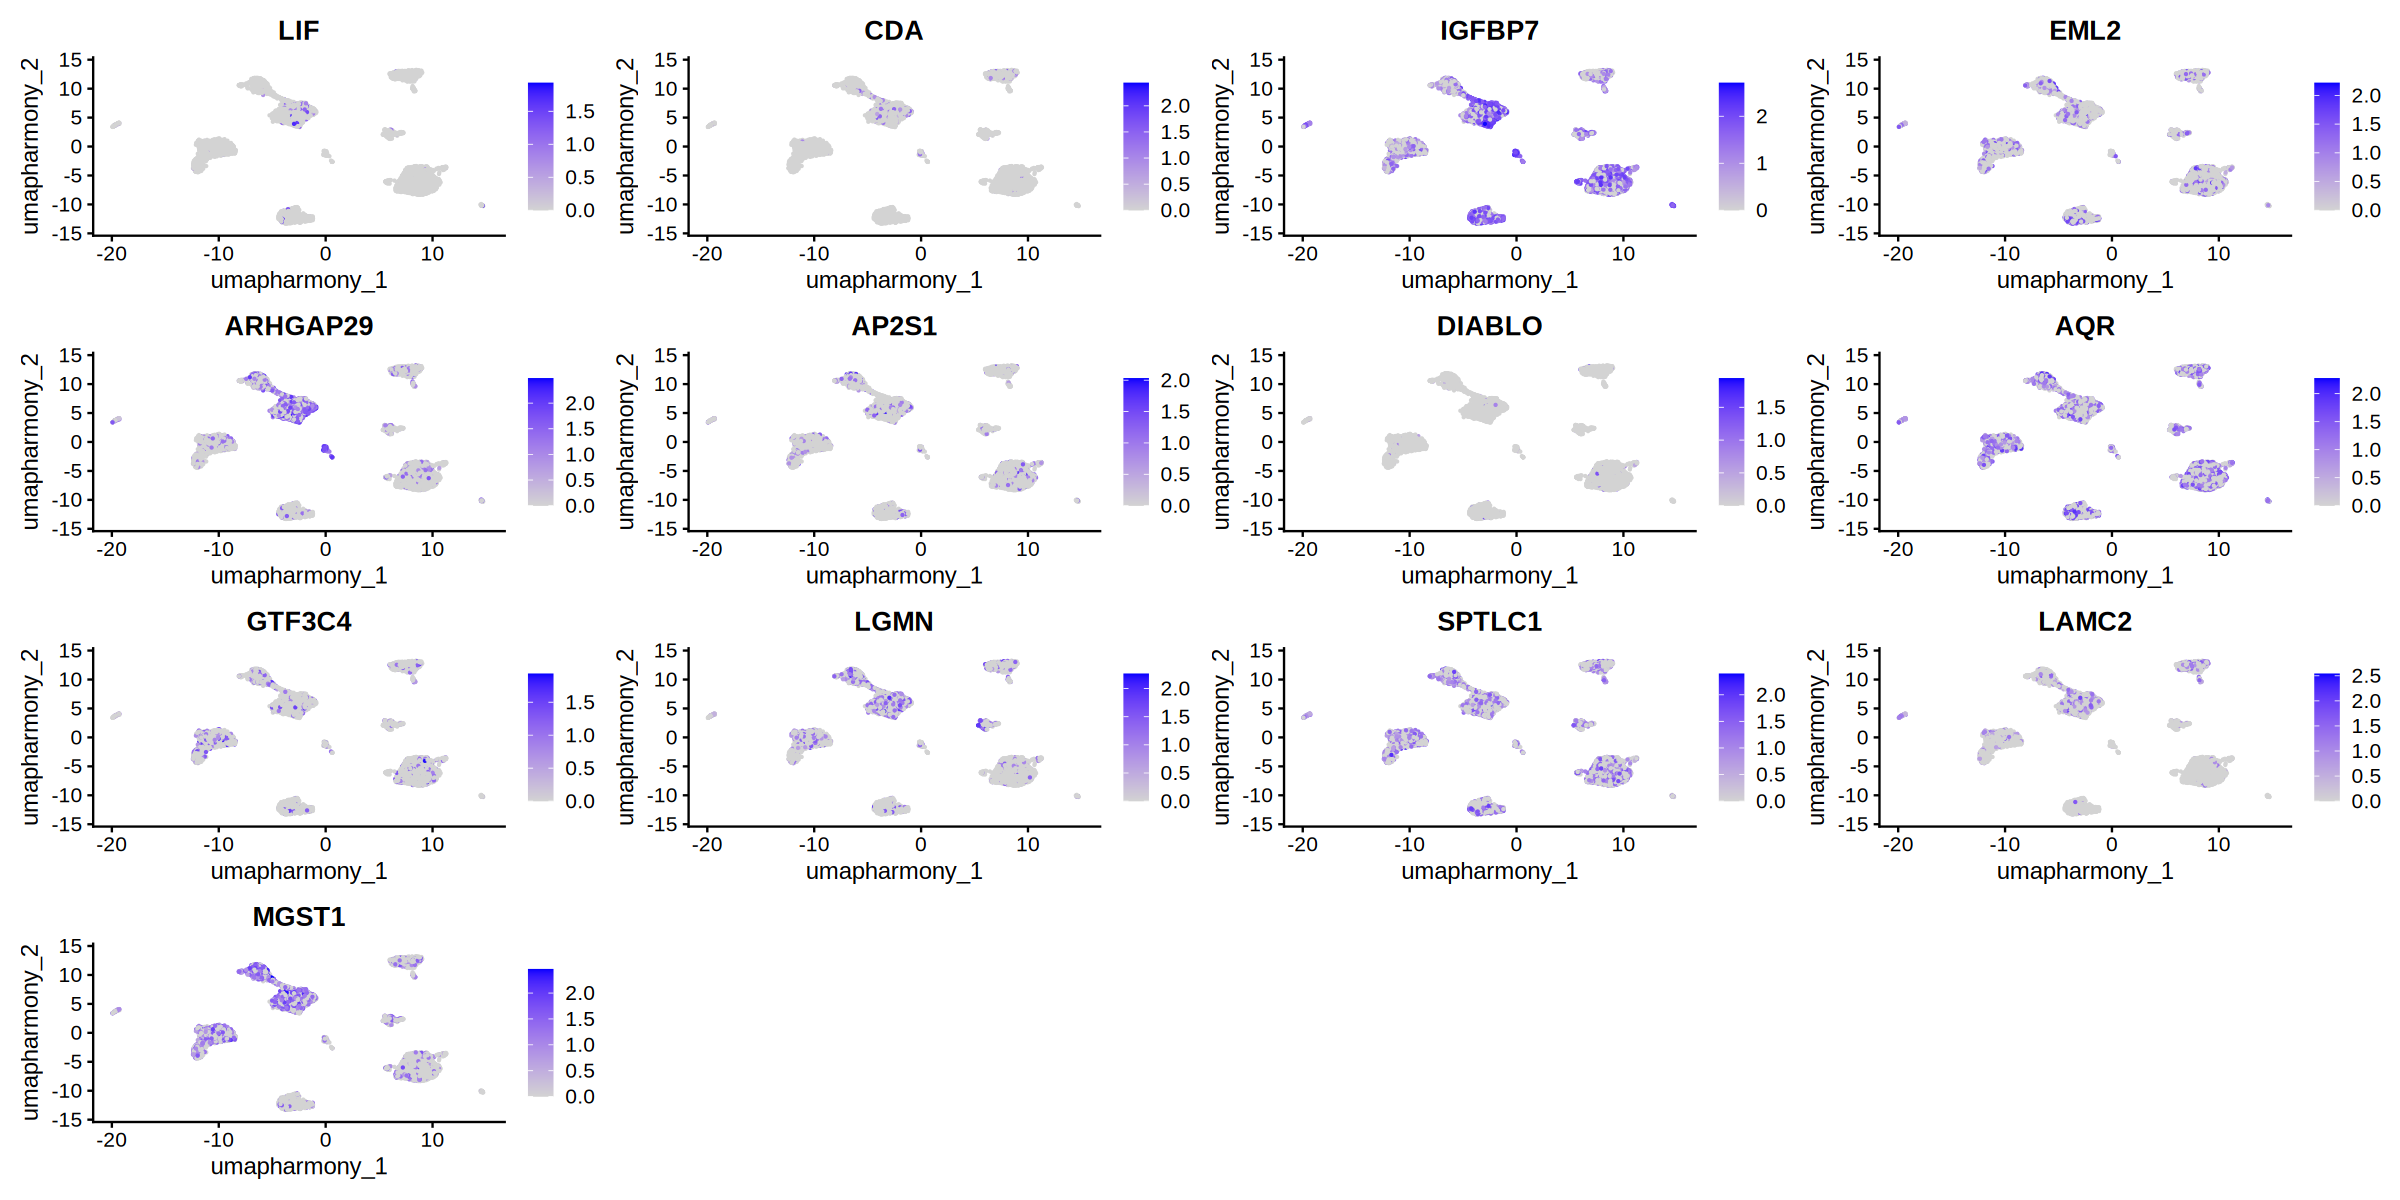

In [8]:
options(repr.plot.width=20, repr.plot.height=10)

FeaturePlot(sobj, features = c("LIF", "CDA", "IGFBP7", "EML2", "ARHGAP29", "AP2S1", "DIABLO", "AQR", "GTF3C4", "LGMN", "SPTLC1", "LAMC2", "MGST1"), reduction = "umap_harmony")